In [1]:
import tensorflow as tf
import opendatasets as od
from tensorflow.keras.preprocessing.image import ImageDataGenerator


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
tf.__version__

'2.5.0-rc2'

In [4]:
!pip install opendatasets --upgrade --quiet

You should consider upgrading via the 'c:\users\ali zain\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [6]:
dataset_url="https://www.kaggle.com/kutaykutlu/forest-fire"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ali1zain2
Your Kaggle Key: ········


  0%|                                                                                      | 0.00/2.46G [00:00<?, ?B/s]

100%|████████████████████████████████████████████████████████████████████████████| 2.46G/2.46G [1:06:41<00:00, 661kB/s]


### Data Augmentation

In [3]:

# 2 very important preprocessing is Resizing and Rescaling

batch_size=16
training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)

In [4]:
# dividing the data into training and validation

train=training_datagenarator.flow_from_directory(r'D:\work\Fire Smoke\forest-fire\Train',
                                                target_size=(256, 256),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory(r'D:\work\Fire Smoke\forest-fire\Train',
                                                target_size=(256, 256),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='validation')

Found 12360 images belonging to 2 classes.
Found 1373 images belonging to 2 classes.


In [5]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       147712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0

In [14]:
checkpoint=tf.keras.callbacks.ModelCheckpoint(r'D:/work/models/fire_and_smoke_model.h5',monitor='val_loss',mode="min",save_best_only=True)
# callbacks=checkpoint

In [15]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=[checkpoint] 
                 )

c:\users\ali zain\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


772/772 [==============================] - 1397s 2s/step - loss: 0.0648 - accuracy: 0.9798 - val_loss: 0.0155 - val_accuracy: 0.9926


In [16]:
from tensorflow.keras.models import load_model
cnn=load_model('D:\work\models\Fire_and_Smoke_model.h5')

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [40]:
image_for_testing=r'D:\work\Fire Smoke\forest-fire\model\testImage2.jpg' #D:\work\Fire Smoke\forest-fire\Train


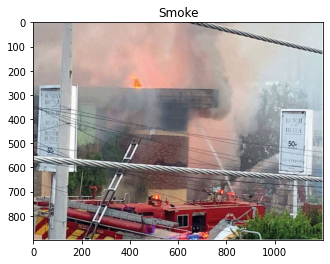

In [41]:
test_image=image.load_img(image_for_testing,target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)

Catagories=['Fire','Smoke']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(result[0][0])])
plt.show()
